In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
from matplotlib import colors
import corner

import wquantiles
import scipy.stats as scistats
from scipy.stats import skewnorm, norm
import scipy as sp

In [2]:
f=8.2202230694*10**(-9)
log_f=np.log10(f)
f_err=1.73*10**(-9)
log_f_err=np.absolute(f_err/(f*np.log(10)))
jenet = 0.7e10
Mc=10**8.5

#model_params should be the same but check
with open('model_params.json', 'r') as fp:
    pars_singleF = json.load(fp)

In [3]:
chain_detect = np.loadtxt('chain_010.txt') #insert the chain you want to analyze

In [4]:
chain = chain_detect

In [5]:
pars = pars_singleF
Trace = False
Posterior = True

In [6]:
print(len(chain[0]))

276


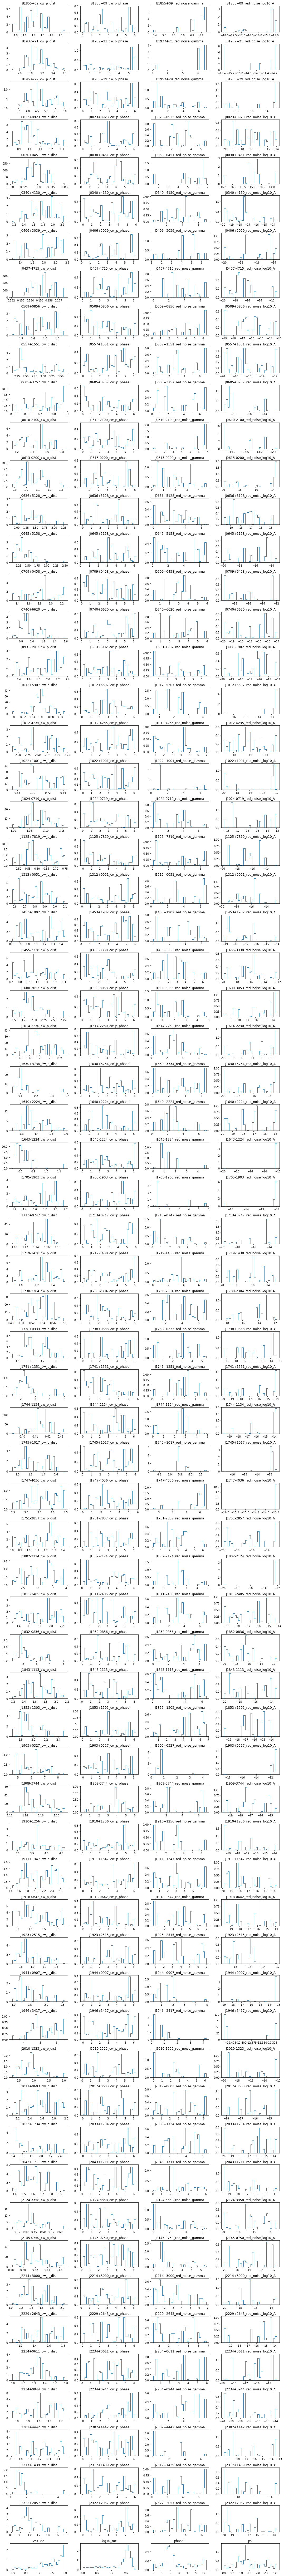

In [7]:
plt.figure(figsize=(15, 2*round(len(pars)/4)))
for ii in range(len(pars)):
    plt.subplot(round(len(pars)/4), 4, ii+1)
    if Trace:
        plt.plot(chain[:,ii])
    if Posterior:
        plt.hist(chain[:,ii], histtype = 'step', density = True, bins = 30);
    plt.title(pars[ii])
plt.tight_layout()

In [8]:
gw_pars_singleF = ['cos_inc', 'log10_mc',  'phase0', 'psi']

In [9]:
singleF_gw_inds = [pars_singleF.index(par) for par in gw_pars_singleF]

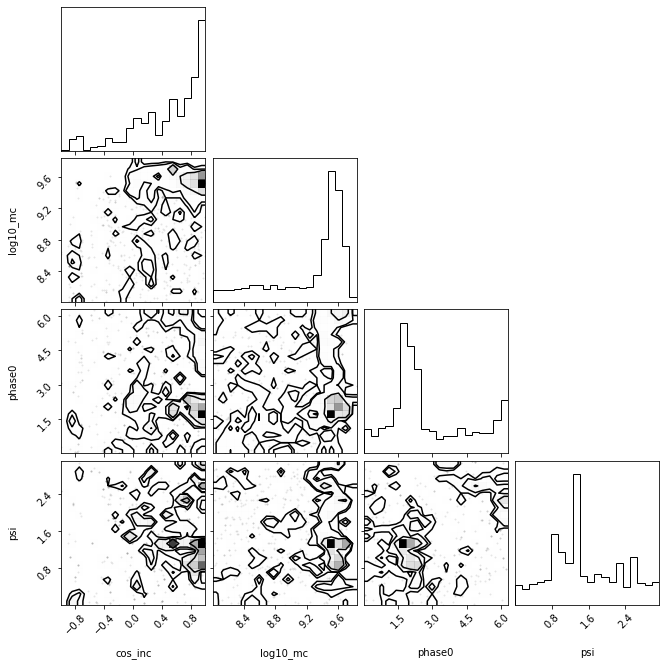

In [10]:
corner.corner(chain_detect[:,singleF_gw_inds], labels = gw_pars_singleF);

In [11]:
mc_index = pars_singleF.index('log10_mc')

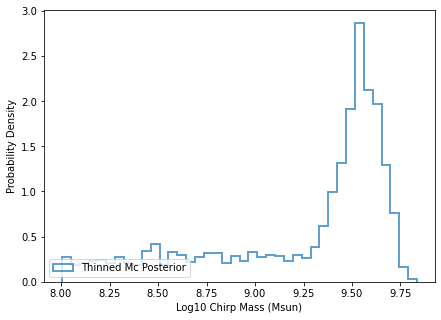

In [12]:
plt.figure(figsize = (7,5))
plt.hist(chain_detect[:,mc_index], bins=40, density=True, lw=2, alpha=0.7, color='C0', histtype='step', 
         label = 'Thinned Mc Posterior');
plt.xlabel('Log10 Chirp Mass (Msun)')
plt.ylabel('Probability Density')
plt.legend(loc = 'lower left');

In [13]:
hist = np.histogram(chain_detect[:,mc_index], bins = 40, density = True)
prior = 1/(10.0-8.0)
posterior_low = hist[0][0]
bf = np.float64(prior/posterior_low)
print('SD BF ~ ' +str((bf).round(2)))

SD BF ~ 1.83


In [14]:
chain_ul = chain

In [15]:
upper_limit = 10**np.percentile(chain_ul[:,mc_index], q=95.0)
s_ul = str((upper_limit/1e9).round(1))
print('Upper Limit = '+s_ul+' x 10^9 Msun')

s_mc = str((np.float64(Mc)/1e8).round(2))

Upper Limit = 4.9 x 10^9 Msun


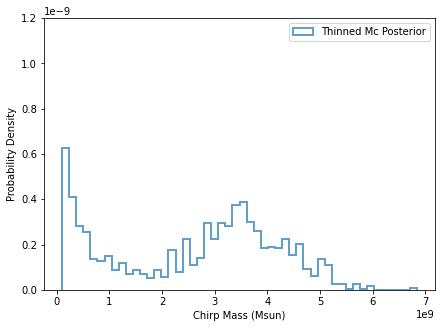

In [16]:
plt.figure(figsize = (7,5))
plt.hist(10**chain_ul[:,mc_index], bins=50, density=True, lw=2, alpha=0.7, color='C0', histtype='step', 
         label = 'Thinned Mc Posterior');
plt.ylim(0,1.2e-9)
#plt.axvline(upper_limit, label = 'Upper Limit = '+s_ul+' x10^9 Msun')
#plt.axvline(Mc, label = 'estimate = '+s_mc+' x10^8.5 Msun', color = 'C1', ls = '--')

plt.xlabel('Chirp Mass (Msun)')
plt.ylabel('Probability Density')
plt.legend(loc = 'upper right');

In [17]:
#select samples that we want to inspect
phase_1909_ind = pars_singleF.index('J1909-3744_cw_p_phase')
phase_0613_ind = pars_singleF.index('J0613-0200_cw_p_phase')
inds = [phase_1909_ind, phase_0613_ind, mc_index]

sub_chain = chain_ul[:,inds]

gw_chain_hump = np.array([chain for chain in sub_chain if chain[2]<np.log10(1.1e9) and chain[2]>np.log10(8e8)])
gw_chain_not = np.array([chain for chain in sub_chain if chain[2]>np.log10(1.1e9) or chain[2]<np.log10(8e8)])

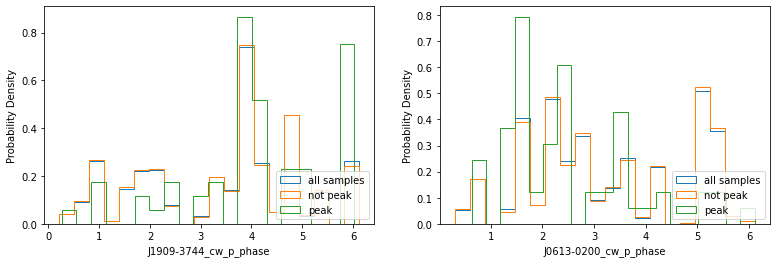

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (13,4))

ax1.hist(sub_chain[:, 0], histtype = 'step', density = True, bins = 20, label = 'all samples');
ax1.hist(gw_chain_not[:, 0], histtype = 'step', density = True, bins = 20, label = 'not peak');
ax1.hist(gw_chain_hump[:, 0], histtype = 'step', density = True, bins = 20, label = 'peak');

ax1.set_xlabel(pars_singleF[phase_1909_ind]);
ax1.set_ylabel('Probability Density');
ax1.legend(loc = 'lower right');

ax2.hist(sub_chain[:, 1], histtype = 'step', density = True, bins = 20, label = 'all samples');
ax2.hist(gw_chain_not[:, 1], histtype = 'step', density = True, bins = 20, label = 'not peak');
ax2.hist(gw_chain_hump[:, 1], histtype = 'step', density = True, bins = 20, label = 'peak');

ax2.set_xlabel(pars_singleF[phase_0613_ind]);
ax2.set_ylabel('Probability Density');
ax2.legend(loc = 'lower right');